In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Introduction: Average (Mean) ##

#### Watch Demo Video Below

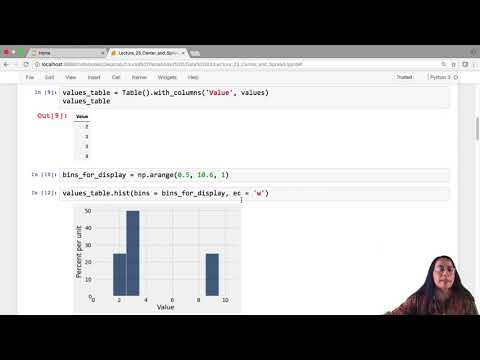

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('ts2_qYrpreo', width=800, height=300)

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [ ]:
values = make_array(2, 3, 3, 9)

In [ ]:
sum(values) / len(values), np.average(values), np.mean(values)

In [ ]:
(2 + 3 + 3 + 9) / 4

In [ ]:
2 * (1/4) + 3 * (2/4) + 9 * (1/4)

In [ ]:
2 * 0.25 + 3 * 0.5 + 9 * 0.25

In [ ]:
values_table = Table().with_columns('Value', values)
values_table

In [ ]:
bins_for_display = np.arange(0.5, 10.6, 1)

In [ ]:
values_table.hist(bins = bins_for_display, ec = 'w')

In [ ]:
2 * np.ones(10)

In [ ]:
twos = 2 * np.ones(10)
threes = 3 * np.ones(20)
nines = 9 * np.ones(10)

In [ ]:
new_values = np.append(np.append(twos, threes), nines)

In [ ]:
len(new_values)

In [ ]:
new_values_table = Table().with_column('Value', new_values)
new_values_table.hist(bins = bins_for_display)

In [ ]:
np.average(new_values), np.average(values)

## The Average and the Median ##

#### Watch Demo Video Below

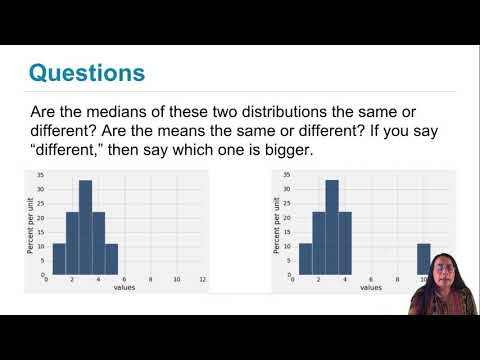

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('xmQ7nt2BmS0', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
nba = Table.read_table('nba2013.csv')

In [ ]:
nba

In [ ]:
nba.hist('Height', bins=np.arange(65.5, 90.5), ec='w')

In [ ]:
heights = nba.column('Height')
percentile(50, heights), np.average(heights)

## Standard Deviation ##

#### Watch Demo Video Below

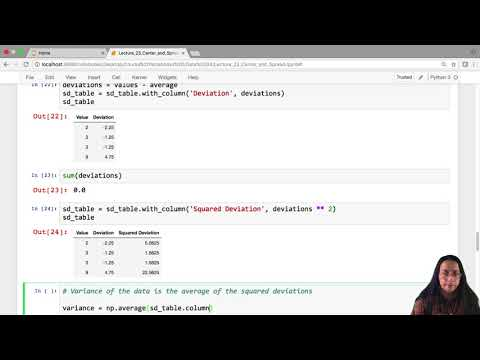

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('05L4UQ6V3rE', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
sd_table = Table().with_columns('Value', values)
sd_table

In [ ]:
average = np.average(values)
average

In [ ]:
deviations = values - average
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

In [ ]:
sum(deviations)

In [ ]:
sd_table = sd_table.with_column('Squared Deviation', deviations ** 2)
sd_table

In [ ]:
# Variance of the data is the average of the squared deviations

variance = np.average(sd_table.column('Squared Deviation'))
variance

In [ ]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

In [ ]:
np.std(values)

## Chebyshev's Bounds ##

#### Watch Demo Video Below

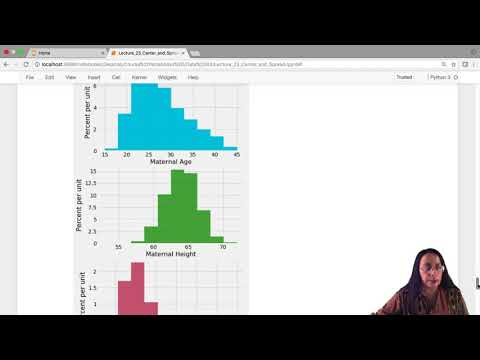

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('PAmOpjJ3u0w', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
births = Table.read_table('baby.csv')

In [ ]:
births

In [ ]:
births.hist('Maternal Pregnancy Weight')

In [ ]:
mpw = births.column('Maternal Pregnancy Weight')
average = np.average(mpw)
sd = np.std(mpw)
average, sd

In [ ]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(average - 3*sd, average + 3*sd))

In [ ]:
within_3_SDs.num_rows / births.num_rows

In [ ]:
# Chebyshev's bound for the proportion in the range "average plus or minus 3 SDs"
# is at least

1 - 1/3**2

In [ ]:
births.hist(overlay = False)

In [ ]:
# See if Chebyshev's bounds work
# for different shapes of distributions

for k in births.labels:
    values = births.column(k)
    average = np.average(values)
    sd = np.std(values)
    print()
    print(k)
    for z in np.arange(2, 6):
        chosen = births.where(k, are.between(average - z*sd, average + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%')